# Apply TF-IDF and K-Means Clustering

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Apply to the descriptions

In [3]:
# import the dataset
df = pd.read_csv('descriptions-cleaned.csv')

In [4]:
# remove the punctuation
df['desc_string'] = df['description'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [5]:
df

,Unnamed: 0,description,desc_string
0,0,"['unique', 'dish', 'moulded', 'slabs', 'bisque...",unique dish moulded slabs bisque fired glazed...
1,1,"['unique', 'pinch', 'pot', 'bisque', 'fired', ...",unique pinch pot bisque fired glazed allow di...
2,2,"['unique', 'bowl', 'bisque', 'fired', 'glazed'...",unique bowl bisque fired glazed allow differe...
3,3,"['unique', 'pinch', 'pot', 'bisque', 'fired', ...",unique pinch pot bisque fired glazed allow di...
4,4,"['unique', 'moulded', 'slabs', 'bisque', 'fire...",unique moulded slabs bisque fired glazed allo...
...,...,...,...
11995,11995,"['stylish', 'studio', 'vase', 'brown', 'glaze'...",stylish studio vase brown glaze incised easte...
11996,11996,"['free', 'tracking', 'included', 'crafted', 'h...",free tracking included crafted holm denmark g...
11997,11997,"['vintage', 'thrown', 'salt', 'glaze', 'drip',...",vintage thrown salt glaze drip effect blue br...
11998,11998,"['stunning', 'retro', 'style', 'mug', 'rich', ...",stunning retro style mug rich brown rust beig...


In [6]:
# change the dataframe column to a series to use with the model
desc = df['desc_string']

TD-IDF Vectorization

In [7]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=15)

In [8]:
#? TfidfVectorizer

In [9]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(desc)

In [10]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Apply K-means algorithm

In [11]:
# intialize k-means
kmeans = KMeans(n_clusters=8, random_state=42)

In [12]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(random_state=42)

In [13]:
# store cluster labels in a variable
clusters = kmeans.labels_

In [14]:
#look at the cluster labels
[c for c in clusters][:20]

[7, 7, 7, 7, 7, 7, 5, 5, 3, 5, 5, 5, 0, 5, 0, 5, 0, 0, 0, 0]

Dimension Reduction and Visualization

In [15]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

In [16]:
# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [17]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [18]:
len(df)

12000

In [19]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

Visualize

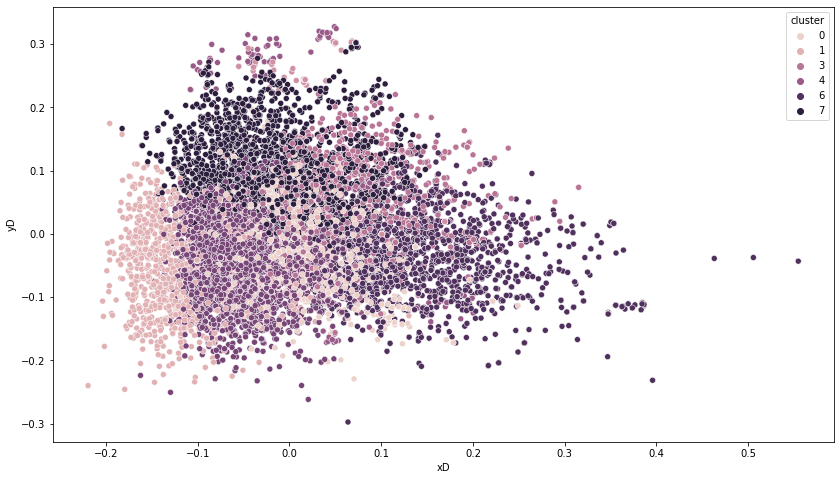

In [20]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster')
plt.show()

In [21]:
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([words[w] for w in np.argsort(r)[-n:]]))

This is nonsense!  Try something other than K-means, try the algorithm on the titles, join the titles and description together?

In [22]:
top_words(10)


Cluster 0
serving,thrown,wheel,microwave,glaze,food,dishwasher,bowls,safe,bowl

Cluster 1
shop,bottom,signed,excellent,good,tall,cracks,chips,condition,vintage

Cluster 2
gold,fluid,board,unpredictable,ever,days,millilitres,mugs,business,wood

Cluster 3
capacity,glaze,dishwasher,safe,cups,ml,mug,tea,coffee,cup

Cluster 4
thrown,accents,bohonpottery,safe,shop,shipments,usps,light,meganwarnerpottery,amount

Cluster 5
approx,tall,small,pot,white,unique,glazed,fired,vase,glaze

Cluster 6
glaze,handle,food,wheel,holds,thrown,dishwasher,microwave,safe,mug

Cluster 7
plates,food,dishwasher,unique,glaze,free,shop,order,plate,safe
